In [819]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from itertools import *
df = pd.read_csv("Price_euros_train.csv")
test = pd.read_csv("Price_euros_test.csv")
df = df.drop(columns= ['laptop_ID', 'Product', 'OpSys', 'TypeName'])
test = test.drop(columns= ['laptop_ID', 'Product', 'OpSys', 'TypeName'])
pd.set_option('display.max_rows', 10)
df

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_euros
0,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,1.34kg,898.94
1,Apple,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,1.83kg,2537.45
2,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,1.37kg,1803.60
3,Acer,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,2.1kg,400.00
4,Apple,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,2.04kg,2139.97
...,...,...,...,...,...,...,...,...,...
1103,Asus,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,2.2kg,720.32
1104,Lenovo,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,1.8kg,638.00
1105,Lenovo,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,1.5kg,229.00
1106,HP,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,2.19kg,764.00


<Axes: xlabel='Price_euros', ylabel='Count'>

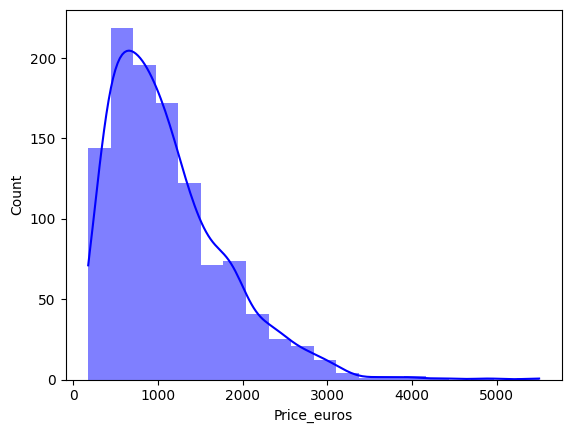

In [820]:
sns.histplot((df['Price_euros']),bins=20,color="blue", kde=True, linewidth=0)

In [821]:
def split(s, i):
    if s == 'nan':
        return np.nan
    else:
        return int(s.split()[-1].split('x')[i])
def split2(s):
    if s == 'nan' or s == '':
        return np.nan
    else:
        if '+' in s:
            s = s.split('+')
            ans = 0
            if s[0].split()[0][-2:] == 'TB':
                ans += float(s[0].split()[0][:-2]) * 1000
            else:
                ans += float(s[0].split()[0][:-2])
            if s[1].split()[0][-2:] == 'TB':
                ans += float(s[1].split()[0][:-2]) * 1000
            else:
                ans += float(s[1].split()[0][:-2])
            return ans;        
        else:
            if s.split()[0][-2:] == 'TB':
                return float(s.split()[0][:-2]) * 1000
            else:
                return float(s.split()[0][:-2])
def split3(s, i):
    if s == 'nan' or s == '':
        return np.nan
    else:
        if '+' in s and i != 2:
            s = s.split('+')
            if i == 0:
                if s[0].split()[0][-2:] == 'TB':
                   return float(s[0].split()[0][:-2]) * 1000
                else:
                   return float(s[0].split()[0][:-2])
            if i == 1:
                if s[1].split()[0][-2:] == 'TB':
                    return float(s[1].split()[0][:-2]) * 1000
                else:
                    return float(s[1].split()[0][:-2])       
        else:
            if i == 0 and s.split()[-1] == 'SSD':
                if s.split()[0][-2:] == 'TB':
                    return float(s.split()[0][:-2]) * 1000
                else:
                    return float(s.split()[0][:-2])
            if i == 1 and s.split()[-1] == 'HDD':
                if s.split()[0][-2:] == 'TB':
                    return float(s.split()[0][:-2]) * 1000
                else:
                    return float(s.split()[0][:-2])
            if i == 2 and s.split()[-1] == 'Storage':
                if s.split()[0][-2:] == 'TB':
                    return float(s.split()[0][:-2]) * 1000
                else:
                    return float(s.split()[0][:-2])
            if i == 3 and s.split()[-1] == 'Hybrid':
                if s.split()[0][-2:] == 'TB':
                    return float(s.split()[0][:-2]) * 1000
                else:
                    return float(s.split()[0][:-2])
#df['IPS'] = df['ScreenResolution'].astype(str).map(lambda x : 1 if 'IPS' in x else 0)
#df['Touchscreen'] = df['ScreenResolution'].astype(str).map(lambda x : 1 if 'Touchscreen' in x else 0)
df['WidthScreen'] = df['ScreenResolution'].astype(str).apply(split, args=(0,))
df['LenthScreen'] = df['ScreenResolution'].astype(str).apply(split, args=(1,))
df['ssd'] = df['Memory'].astype(str).apply(split3, args=(0,))
df['hdd'] = df['Memory'].astype(str).apply(split3, args=(1,))
df['flash'] = df['Memory'].astype(str).apply(split3, args=(2,))
df['Hybrid'] = df['Memory'].astype(str).apply(split3, args=(3,))
df[['hdd', 'ssd', 'flash', 'Hybrid']] = df[['hdd', 'ssd', 'flash', 'Hybrid']].fillna(0)
df['GHz'] = df['Cpu'].astype(str).map(lambda x : np.nan if x == 'nan' or x == '' else float(x.split()[-1][:-3]))
df['Ram'] = df['Ram'].astype(str).map(lambda x : np.nan if x == 'nan' or x == '' else int(x[:-2]))
df['Weight'] = df['Weight'].astype(str).map(lambda x : np.nan if x == 'nan' else float(x[:-2]))
df['Gpu'] = df['Cpu'].astype(str).map(lambda x : np.nan if x == 'nan' or x == '' else (x.split()[0]))
#df['Cpu'] = df['Cpu'].astype(str).map(lambda x : np.nan if x == 'nan' or x == '' else (x.split()[0]))
pd.set_option('display.max_columns', None)
df = df.drop(columns= ['ScreenResolution', 'Memory'])
df



,Company,Inches,Cpu,Ram,Gpu,Weight,Price_euros,WidthScreen,LenthScreen,ssd,hdd,flash,Hybrid,GHz
0,Apple,13.3,Intel Core i5 1.8GHz,8,Intel,1.34,898.94,1440.0,900.0,0.0,0.0,128.0,0.0,1.8
1,Apple,15.4,Intel Core i7 2.7GHz,16,Intel,1.83,2537.45,2880.0,1800.0,512.0,0.0,0.0,0.0,2.7
2,Apple,13.3,Intel Core i5 3.1GHz,8,Intel,1.37,1803.60,2560.0,1600.0,256.0,0.0,0.0,0.0,3.1
3,Acer,15.6,AMD A9-Series 9420 3GHz,4,AMD,2.10,400.00,1366.0,768.0,0.0,500.0,0.0,0.0,3.0
4,Apple,15.4,Intel Core i7 2.2GHz,16,Intel,2.04,2139.97,2880.0,1800.0,0.0,0.0,256.0,0.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,Asus,15.6,Intel Core i7 6500U 2.5GHz,4,Intel,2.20,720.32,1366.0,768.0,0.0,500.0,0.0,0.0,2.5
1104,Lenovo,14.0,Intel Core i7 6500U 2.5GHz,4,Intel,1.80,638.00,1920.0,1080.0,128.0,0.0,0.0,0.0,2.5
1105,Lenovo,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel,1.50,229.00,1366.0,768.0,0.0,0.0,64.0,0.0,1.6
1106,HP,15.6,Intel Core i7 6500U 2.5GHz,6,Intel,2.19,764.00,1366.0,768.0,0.0,1000.0,0.0,0.0,2.5


In [822]:
#test['IPS'] = test['ScreenResolution'].astype(str).map(lambda x : 1 if 'IPS' in x else 0)
#test['Touchscreen'] = test['ScreenResolution'].astype(str).map(lambda x : 1 if 'Touchscreen' in x else 0)
test['WidthScreen'] = test['ScreenResolution'].astype(str).apply(split, args=(0,))
test['LenthScreen'] = test['ScreenResolution'].astype(str).apply(split, args=(1,))
test['ssd'] = test['Memory'].astype(str).apply(split3, args=(0,))
test['hdd'] = test['Memory'].astype(str).apply(split3, args=(1,))
test['flash'] = test['Memory'].astype(str).apply(split3, args=(2,))
test['Hybrid'] = test['Memory'].astype(str).apply(split3, args=(3,))
test[['hdd', 'ssd', 'flash', 'Hybrid']] = test[['hdd', 'ssd', 'flash', 'Hybrid']].fillna(0)
test['GHz'] = test['Cpu'].astype(str).map(lambda x : np.nan if x == 'nan' or x == '' else float(x.split()[-1][:-3]))
#test['Cpu'] = test['Cpu'].astype(str).map(lambda x : np.nan if x == 'nan' or x == '' else (x.split()[0]))
test['Ram'] = test['Ram'].astype(str).map(lambda x : np.nan if x == 'nan' or x == '' else int(x[:-2]))
test['Weight'] = test['Weight'].astype(str).map(lambda x : np.nan if x == 'nan' else float(x[:-2]))
test['Gpu'] = test['Cpu'].astype(str).map(lambda x : np.nan if x == 'nan' or x == '' else (x.split()[0]))
# test['Gpu'] = df.groupby('Gpu')['Price_euros'].transform('mean')
pd.set_option('display.max_columns', None)
test = test.drop(columns= ['ScreenResolution', 'Memory'])
test

,Company,Inches,Cpu,Ram,Gpu,Weight,WidthScreen,LenthScreen,ssd,hdd,flash,Hybrid,GHz
0,Acer,15.6,AMD A9-Series 9420 3GHz,4,AMD,2.10,1366.0,768.0,0.0,1000.0,0.0,0.0,3.0
1,Razer,14.0,Intel Core i7 7700HQ 2.8GHz,16,Intel,1.95,1920.0,1080.0,1000.0,0.0,0.0,0.0,2.8
2,Asus,15.6,Intel Core i7 8550U 1.8GHz,8,Intel,1.70,1920.0,1080.0,256.0,0.0,0.0,0.0,1.8
3,Asus,17.3,Intel Core i7 7700HQ 2.8GHz,16,Intel,2.99,1920.0,1080.0,256.0,1000.0,0.0,0.0,2.8
4,Dell,15.6,Intel Core i5 7200U 2.5GHz,12,Intel,2.25,1366.0,768.0,0.0,1000.0,0.0,0.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,HP,15.6,Intel Core i5 6200U 2.3GHz,4,Intel,2.07,1920.0,1080.0,0.0,500.0,0.0,0.0,2.3
191,Acer,15.6,Intel Core i7 8550U 1.8GHz,8,Intel,2.20,1920.0,1080.0,0.0,1000.0,0.0,0.0,1.8
192,HP,13.3,Intel Core i7 7500U 2.7GHz,8,Intel,1.32,1920.0,1080.0,256.0,0.0,0.0,0.0,2.7
193,Dell,15.6,Intel Core i7 7500U 2.7GHz,16,Intel,2.09,1920.0,1080.0,512.0,0.0,0.0,0.0,2.7


In [823]:
# df = df.join(pd.get_dummies(df.Company).astype(int))
# test = test.join(pd.get_dummies(df.Company).astype(int))
df = df.drop(columns=['Company'])
test = test.drop(columns=['Company'])

# df = df.join(pd.get_dummies(df.TypeName).astype(int))
# test = test.join(pd.get_dummies(df.TypeName).astype(int))
# df = df.drop(columns=['TypeName'])
# test = test.drop(columns=['TypeName'])

# df = df.join(pd.get_dummies(df.OpSys).astype(int))
# test = test.join(pd.get_dummies(df.OpSys).astype(int))
# df = df.drop(columns=['OpSys'])
# test = test.drop(columns=['OpSys'])

# df['Cpu'] = 'cpu ' + df['Cpu']
# test['Cpu'] = 'cpu ' + test['Cpu']
# df = df.join(pd.get_dummies(df.Cpu).astype(int))
# test = test.join(pd.get_dummies(df.Cpu).astype(int))
df = df.drop(columns=['Cpu'])
test = test.drop(columns=['Cpu'])

# df['Gpu'] = 'Gpu ' + df['Gpu']
# test['Gpu'] = 'Gpu ' + test['Gpu']
# df = df.join(pd.get_dummies(df.Gpu).astype(int))
# test = test.join(pd.get_dummies(df.Gpu).astype(int))
df = df.drop(columns=['Gpu'])
test = test.drop(columns=['Gpu'])
df

,Inches,Ram,Weight,Price_euros,WidthScreen,LenthScreen,ssd,hdd,flash,Hybrid,GHz
0,13.3,8,1.34,898.94,1440.0,900.0,0.0,0.0,128.0,0.0,1.8
1,15.4,16,1.83,2537.45,2880.0,1800.0,512.0,0.0,0.0,0.0,2.7
2,13.3,8,1.37,1803.60,2560.0,1600.0,256.0,0.0,0.0,0.0,3.1
3,15.6,4,2.10,400.00,1366.0,768.0,0.0,500.0,0.0,0.0,3.0
4,15.4,16,2.04,2139.97,2880.0,1800.0,0.0,0.0,256.0,0.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...
1103,15.6,4,2.20,720.32,1366.0,768.0,0.0,500.0,0.0,0.0,2.5
1104,14.0,4,1.80,638.00,1920.0,1080.0,128.0,0.0,0.0,0.0,2.5
1105,14.0,2,1.50,229.00,1366.0,768.0,0.0,0.0,64.0,0.0,1.6
1106,15.6,6,2.19,764.00,1366.0,768.0,0.0,1000.0,0.0,0.0,2.5


In [824]:
df.dropna(how='all', inplace=True)
print(df.isna().sum().values)
print(test.isna().sum().values)

[ 0  0 22  0 11 11  0  0  0  0  0]
[0 0 4 2 2 0 0 0 0 0]


In [825]:
pd.set_option('display.max_rows', 15)
#df = df.drop(columns= ['Gpu'])
df = df[df.isnull().sum(axis=1) <= 7]
df[df.isnull().any(1)]

C:\Users\user\AppData\Local\Temp\ipykernel_8764\2090667164.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.isnull().any(1)]


,Inches,Ram,Weight,Price_euros,WidthScreen,LenthScreen,ssd,hdd,flash,Hybrid,GHz
13,15.4,16,NaN,2858.0,2880.0,1800.0,512.0,0.0,0.0,0.0,2.9
25,14.0,2,NaN,199.0,1366.0,768.0,0.0,0.0,32.0,0.0,1.5
37,13.3,8,NaN,1419.0,2560.0,1600.0,256.0,0.0,0.0,0.0,2.0
51,17.3,16,NaN,1299.0,1920.0,1080.0,256.0,2000.0,0.0,0.0,1.8
61,13.3,8,NaN,955.0,1920.0,1080.0,256.0,0.0,0.0,0.0,1.8
...,...,...,...,...,...,...,...,...,...,...,...
831,13.3,16,NaN,1899.0,3200.0,1800.0,512.0,0.0,0.0,0.0,1.3
853,13.3,8,1.40,1150.0,NaN,NaN,256.0,0.0,0.0,0.0,2.5
904,15.6,4,1.96,499.0,NaN,NaN,0.0,500.0,0.0,0.0,2.5
1055,15.6,8,NaN,1169.0,1920.0,1080.0,128.0,1000.0,0.0,0.0,2.6


In [826]:
test[test.isnull().any(1)]

C:\Users\user\AppData\Local\Temp\ipykernel_8764\267161212.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  test[test.isnull().any(1)]


,Inches,Ram,Weight,WidthScreen,LenthScreen,ssd,hdd,flash,Hybrid,GHz
32,15.6,4,NaN,1366.0,768.0,0.0,1000.0,0.0,0.0,2.5
92,13.3,8,NaN,2560.0,1600.0,128.0,0.0,0.0,0.0,2.3
126,15.6,4,1.91,NaN,NaN,128.0,0.0,0.0,0.0,2.0
143,13.3,4,NaN,1366.0,768.0,128.0,0.0,0.0,0.0,2.3
152,15.6,4,NaN,1366.0,768.0,0.0,1000.0,0.0,0.0,1.1
174,17.3,8,2.80,NaN,NaN,256.0,0.0,0.0,0.0,1.6


In [827]:
df['Weight'].corr(df['Inches'])

0.8334764727494387

['Weight', 'WidthScreen', 'LenthScreen']


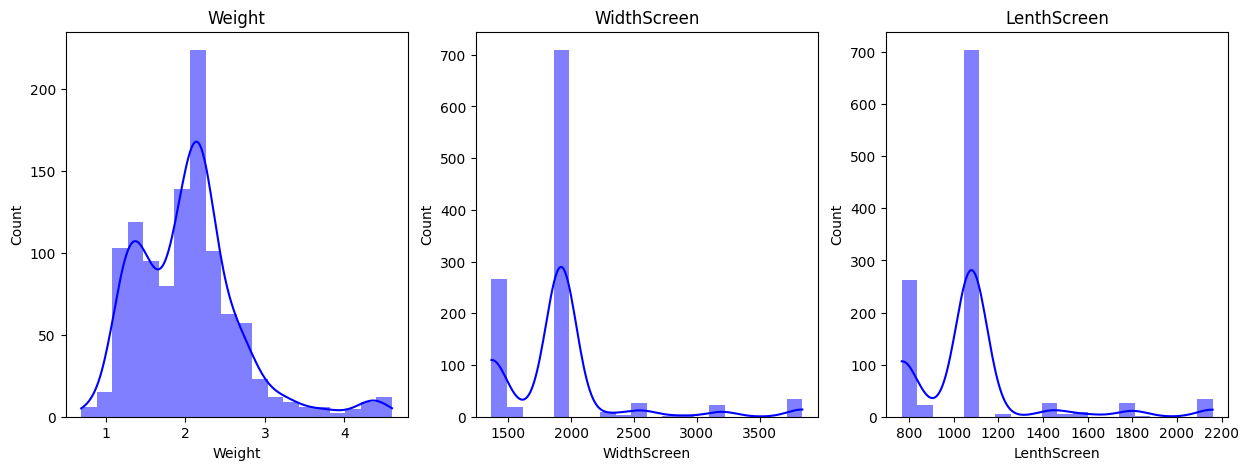

In [828]:
norma = [col for col in df.columns if df[col].isnull().any().any()]
print(norma)
fig, ax = plt.subplots(1, len(norma), figsize = (5 * len(norma), 5))
for i in range(len(norma)):
    ax[i].set_title(norma[i])
    sns.histplot(df[norma[i]],bins=20,color="blue", kde=True, linewidth=0, ax=ax[i])
plt.show()

In [829]:
grouped_df = df.groupby('Inches').mean()
fill_values = df['Inches'].map(grouped_df['Weight'])
df['Weight'] = df['Weight'].fillna(value=fill_values)
mode = df['WidthScreen'].mode().iloc[0]
df['WidthScreen'] = df['WidthScreen'].fillna(value=mode)
mode2 = df['LenthScreen'].mode().iloc[0]
df['LenthScreen'] = df['LenthScreen'].fillna(value=mode2)

In [830]:
grouped_test = test.groupby('Inches').mean()
fill_values = test['Inches'].map(grouped_test['Weight'])
test['Weight'] = test['Weight'].fillna(value=fill_values)
mode = test['WidthScreen'].mode().iloc[0]
test['WidthScreen'] = test['WidthScreen'].fillna(value=mode)
mode2 = test['LenthScreen'].mode().iloc[0]
test['LenthScreen'] = test['LenthScreen'].fillna(value=mode2)

In [831]:
# df['ppi'] = df['LenthScreen'] * df['WidthScreen'] / df['Inches']
# test['ppi'] = df['LenthScreen'] * df['WidthScreen'] / df['Inches']
# df = df.drop(columns=['LenthScreen', 'WidthScreen', 'Inches'])
# test = test.drop(columns=['LenthScreen', 'WidthScreen', 'Inches'])

In [832]:
# df = df.drop(columns=['Inches'])
# test = test.drop(columns=['Inches'])

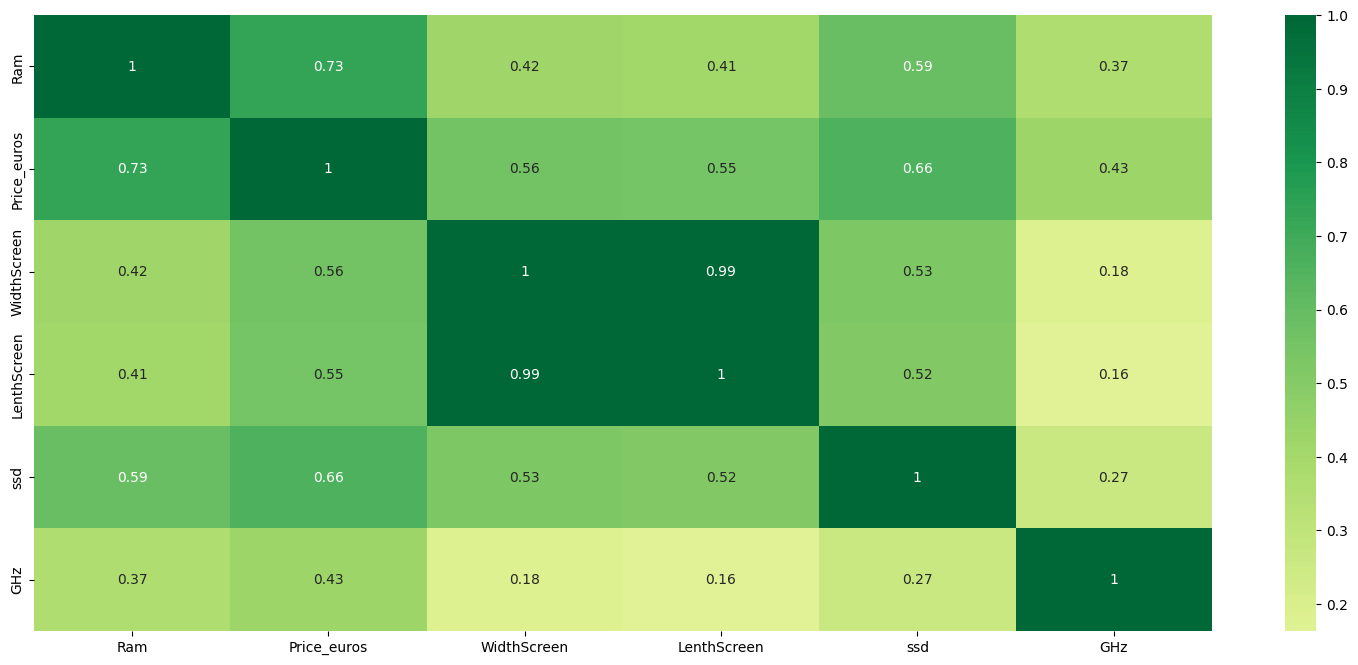

In [833]:
corr_df = df.corr()
low_corr_columns = corr_df[abs(corr_df['Price_euros']) < 0.20].index
# df = df.drop(columns=low_corr_columns)
# test = test.drop(columns=low_corr_columns)
plt.subplots(figsize=(19, 8))
sns.heatmap(df.drop(columns=low_corr_columns).corr(), xticklabels=df.drop(columns=low_corr_columns).corr().columns, yticklabels=df.drop(columns=low_corr_columns).corr().columns, cmap='RdYlGn', center=0, annot=True, fmt='.2g')
plt.show()

In [834]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Price_euros']), df['Price_euros'], test_size=0.15, random_state=42)
print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn import metrics 
from sklearn.feature_selection import f_regression
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", model.score(X_test, y_test))
def regression_coef(model, X, y):
    coef = pd.DataFrame(zip(X.columns, model.coef_), columns=['predictor', 'coef'])
    return coef
regression_coef(model, df.drop(columns=['Price_euros']), df['Price_euros'])

Train dataset size: (941, 10), (941,)
Train dataset size: (167, 10), (167,)
MAE 281.44076711045295
MSE 178501.26195364824
R2 Score: 0.6514481068711049


,predictor,coef
0,Inches,-69.658960
1,Ram,56.656796
2,Weight,142.186620
3,WidthScreen,-0.196990
4,LenthScreen,0.868716
5,ssd,0.845509
6,hdd,-0.074849
7,flash,0.609739
8,Hybrid,-0.186114
9,GHz,265.097248


<Axes: xlabel='Price_euros', ylabel='Count'>

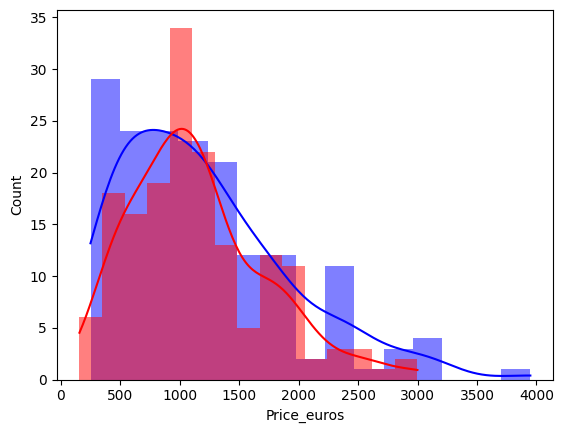

In [835]:
sns.histplot(y_test,bins=15, color="blue", kde=True, linewidth=0)
sns.histplot(y_pred,bins=15, color="red", kde=True, linewidth=0)

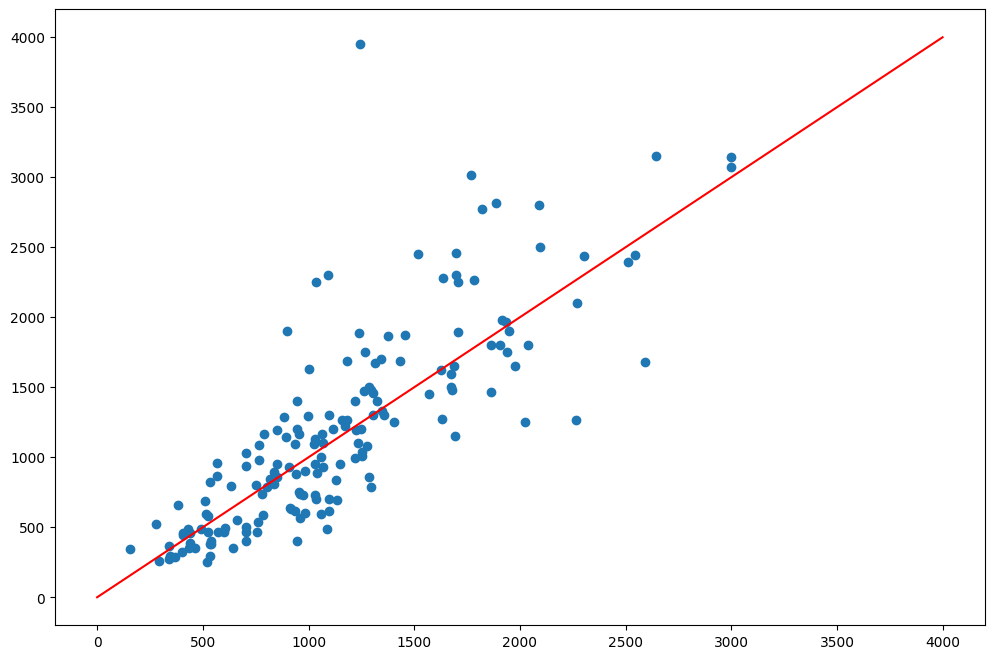

In [836]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred, y_test)
plt.plot(range(0,4000), range(0,4000), c='red')

In [837]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df.drop(columns=['Price_euros']), df['Price_euros'])

LinearRegression()

In [838]:
y_pred = model.predict(test)

In [839]:
from sklearn import metrics 
from sklearn.feature_selection import f_regression
def regression_coef(model, X, y):
    coef = pd.DataFrame(zip(X.columns, model.coef_), columns=['predictor', 'coef'])
    return coef
pd.set_option('display.max_rows', 51)
regression_coef(model, df.drop(columns=['Price_euros']), df['Price_euros'])

,predictor,coef
0,Inches,-70.601860
1,Ram,56.039607
2,Weight,160.926115
3,WidthScreen,-0.223591
4,LenthScreen,0.920053
5,ssd,0.875662
6,hdd,-0.065959
7,flash,0.660426
8,Hybrid,-0.180715
9,GHz,258.832556


In [840]:
ans = pd.DataFrame({'Index': range(len(y_pred)), 'Price_euros': y_pred})
ans.to_csv('ans.csv', index=False)

<Axes: xlabel='Price_euros', ylabel='Density'>

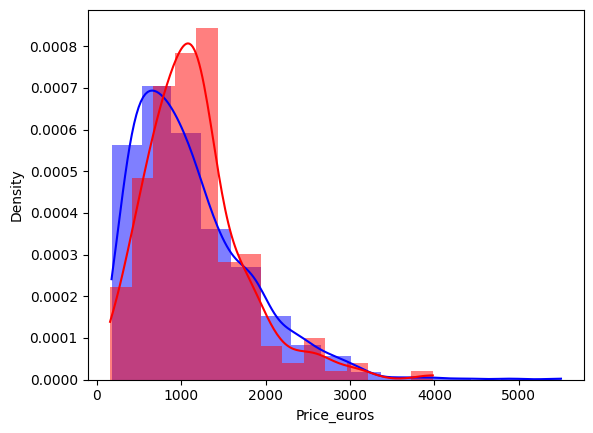

In [841]:
sns.histplot(df['Price_euros'],bins=15, stat='density',color="blue", kde=True, linewidth=0)
sns.histplot(y_pred,bins=15,stat='density',color="red", kde=True, linewidth=0)